# Flight Price Prediction

# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

Imporing the Data Set

In [1]:
import pandas as pd
df=pd.read_excel('Data_Train (fpp).xlsx',parse_dates=['Date_of_Journey'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [3]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Basic details of the dataset

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


Observations:

1.Except response variable every other variables are of object types.

In [7]:
df.shape

(10683, 11)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Exploratory Data Analysis

Univariate Analysis

In [9]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Column 1: Airline

In [10]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

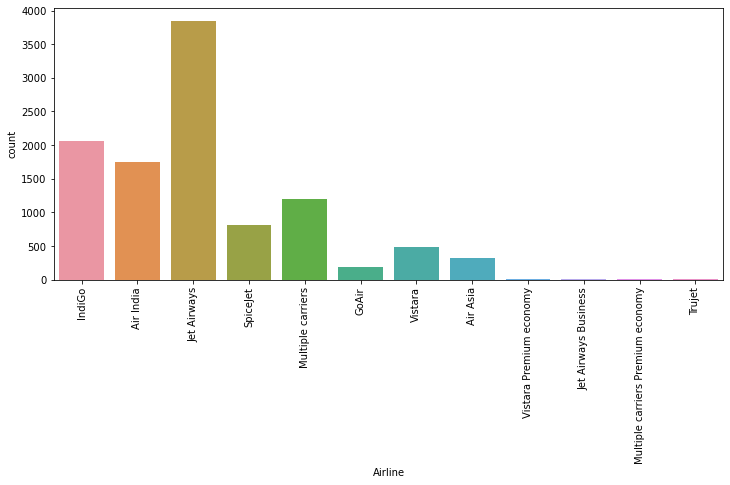

In [11]:
plt.figure(figsize=(12,5))
count15=sns.countplot(df['Airline'])
count15.set_xticklabels(count15.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Most of the observations are from Jet Airways, Indigo and Air India.

In [12]:
#lets create a temporary dataframe
df1=df

In [13]:
import time
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df1['Airline'])
label_Airline=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Airline']=le.fit_transform(df1['Airline'])

Column 2: Date_of_Journey

In [14]:
df1['Date_of_Journey'].head()

0   2019-03-24
1   2019-01-05
2   2019-09-06
3   2019-12-05
4   2019-01-03
Name: Date_of_Journey, dtype: datetime64[ns]

In [15]:
df1['year']=pd.DatetimeIndex(df1['Date_of_Journey']).year

In [16]:
df1['Month']=pd.DatetimeIndex(df1['Date_of_Journey']).month

In [17]:
df1.drop('Date_of_Journey',axis=1,inplace=True)

Column 3:Source

In [18]:
df1['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

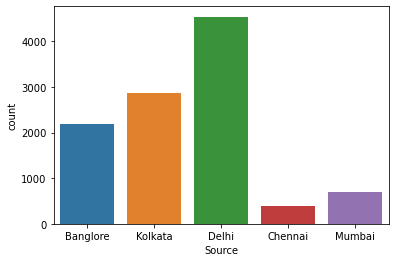

In [19]:
sns.countplot(df1['Source'])

Observations:

1.Most of the observations are made from Delhi, Kolkata and Bangalore.

In [20]:
le.fit(df1['Source'])
label_Source=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Source']=le.fit_transform(df1['Source'])

Column 4:Destination

In [21]:
df1['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

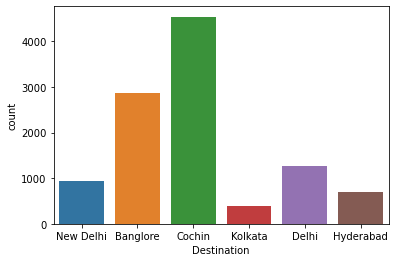

In [22]:
sns.countplot(df1['Destination'])

Observations:

1.Cochin, Bangalore and Delhi are the major destined places.

In [23]:
le.fit(df1['Destination'])
label_Destination=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Destination']=le.fit_transform(df1['Destination'])

Column 5:Route

In [24]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [25]:
df1['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [26]:
list1=df1['Route'].unique()
for i in range(0,129):
    df1['Route'].replace(list1[i],i,inplace=True)

<AxesSubplot:xlabel='Route', ylabel='Density'>

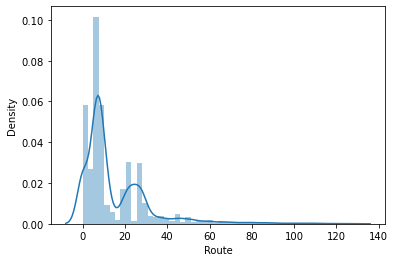

In [27]:
sns.distplot(df1['Route'])

Column 6:Dep_Time

In [28]:
le.fit(df1['Dep_Time'])
label_Dep_Time=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Dep_Time']=le.fit_transform(df1['Dep_Time'])

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

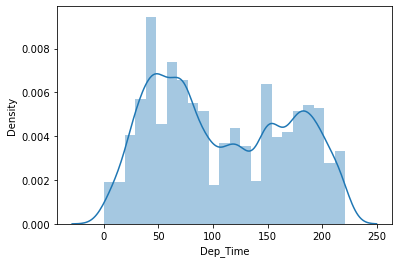

In [29]:
sns.distplot(df1['Dep_Time'])

In [30]:
label_Dep_Time[0]

'00:20'

In [31]:
label_Dep_Time[75]

'09:50'

Observations:

1.Majority of the flights starts from night 12 to morining 10.

Column 7: Arrival_Time

In [32]:
le.fit(df1['Arrival_Time'])
label_Arrival_Time=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Arrival_Time']=le.fit_transform(df1['Arrival_Time'])

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

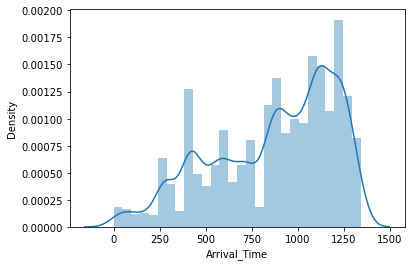

In [33]:
sns.distplot(df1['Arrival_Time'])

Column 8:Duration

In [34]:
le.fit(df1['Duration'])
label_Duration=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Duration']=le.fit_transform(df1['Duration'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

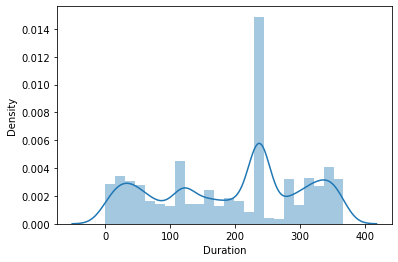

In [35]:
sns.distplot(df1['Duration'])

Observations:

1.Almost all the duration has got equal weightage.

Column 9:Total_Stops

In [36]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

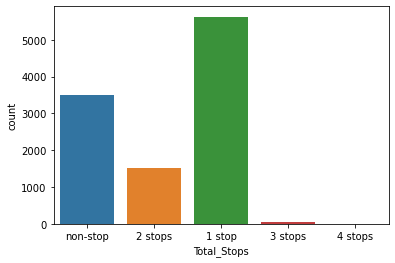

In [37]:
sns.countplot(df1['Total_Stops'])

Observations:

1.In this case 1 stop tops the chart followed by non stop and 2 stop.

In [39]:
df1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
df1['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops ','4 stops'],[1,0,2,3,4],inplace=True)

In [41]:
df1['Total_Stops'].unique()

array([0, 2, 1, '3 stops', nan, 4], dtype=object)

In [42]:
df1['Total_Stops'].replace('3 stops',3,inplace=True)

Column 10:Additional_Info

In [43]:
df1['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

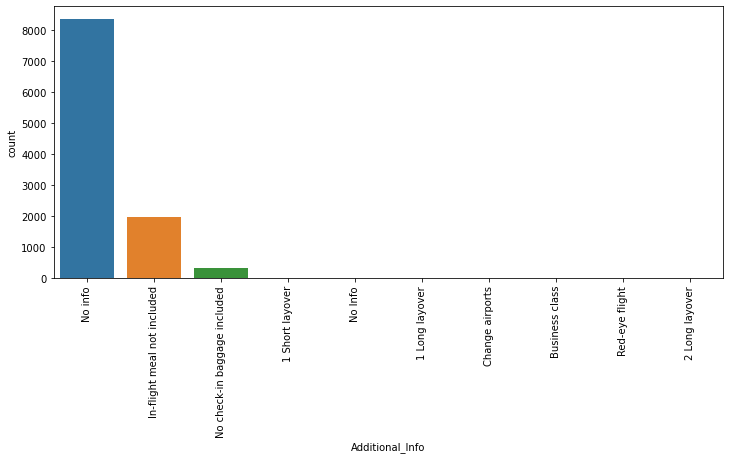

In [44]:
plt.figure(figsize=(12,5))
count115=sns.countplot(df1['Additional_Info'])
count115.set_xticklabels(count115.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Most of the data contains no info.

In [46]:
le.fit(df1['Additional_Info'])
label_Additional_Info=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Additional_Info']=le.fit_transform(df1['Additional_Info'])

Column 11: Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

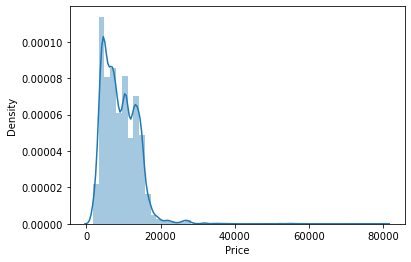

In [47]:
sns.distplot(df1['Price'])

Observations:

1.The price ranges from 0 to 20000.

In [48]:
le.fit(df1['year'])
label_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['year']=le.fit_transform(df1['year'])

In [49]:
le.fit(df1['Month'])
label_Month=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Month']=le.fit_transform(df1['Month'])

In [50]:
le.fit(df1['Airline'])
label_Airline=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['Airline']=le.fit_transform(df1['Airline'])

In [51]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,Month
0,3,0,5,0,211,233,240,0.0,8,3897,0,1
1,1,3,0,1,31,906,336,2.0,8,7662,0,0
2,4,2,1,2,70,413,106,2.0,8,13882,0,5
3,3,3,0,3,164,1324,311,1.0,8,6218,0,6
4,3,0,5,4,149,1237,303,1.0,8,13302,0,0


Multivariate Analysis

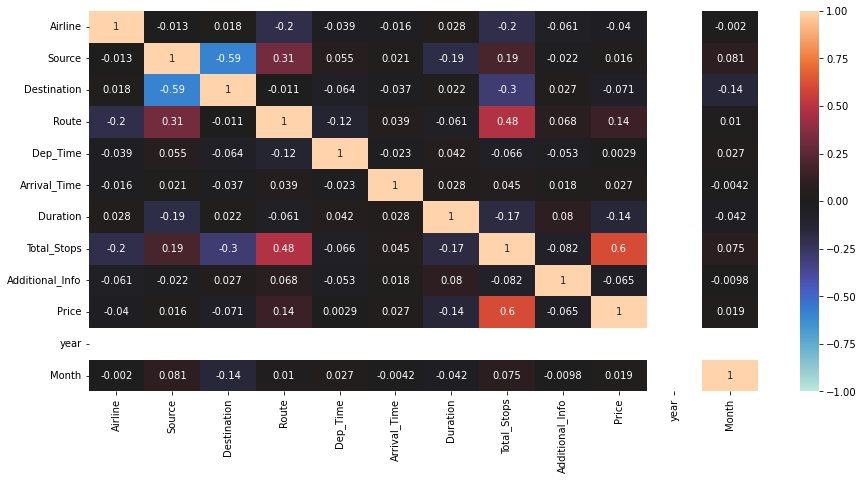

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:

There are some independent variable which are significantly correlated with response variable
    1.Route
    2.Duration
    3.Total_Stops

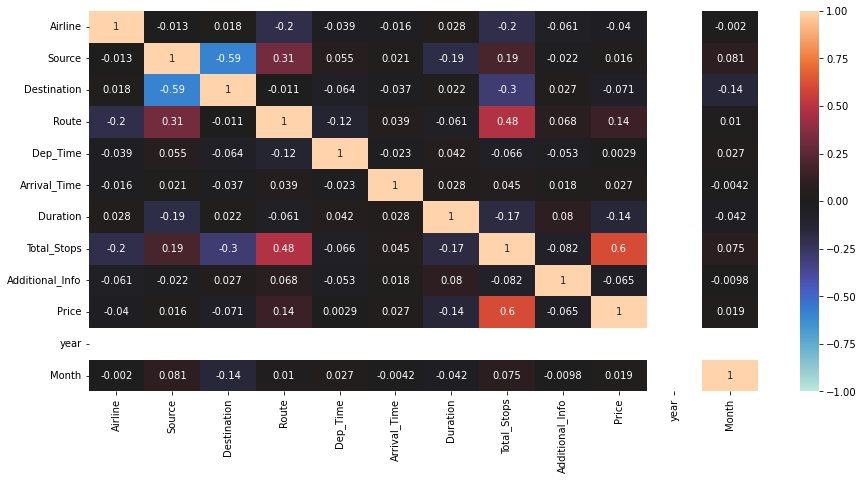

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:

There are some independent variables which are significantly correlated with each other.
    1.Destination vs source
    2.Route vs Airline
    3.Route vs source
    4.Total stops vs airline
    5.duration vs source
    6.Total stops vs source
    7.Total stops vs destination
    8.Route vs total stops

Bi Variate Analysis

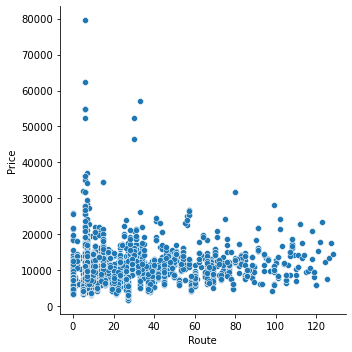

In [56]:
sns.relplot(x='Route',y='Price',data=df1)

Observations:

1.We can see that almost every route has same ranges of price.

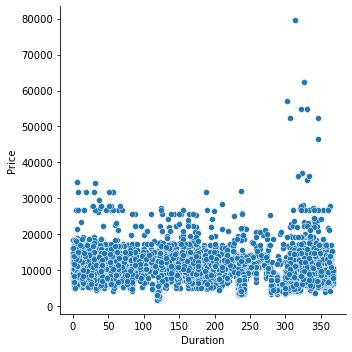

In [57]:
sns.relplot(x='Duration',y='Price',data=df1)

Observations:

1.We can see that as duration increases the flight price is also gonna increase.

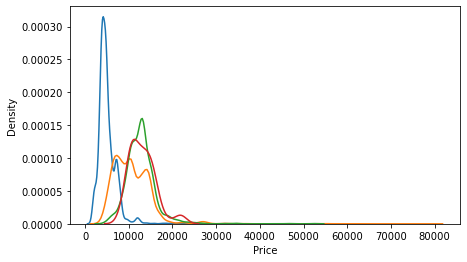

In [58]:
Total_Stops=df1.groupby('Total_Stops')
Total_Stops_0=Total_Stops.get_group(0)
Total_Stops_1=Total_Stops.get_group(1)
Total_Stops_2=Total_Stops.get_group(2)
Total_Stops_3=Total_Stops.get_group(3)
Total_Stops_4=Total_Stops.get_group(4)
plt.figure(figsize=(7,4))
sns.distplot(Total_Stops_0['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_1['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_2['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_3['Price'],hist=False,rug=False)
sns.distplot(Total_Stops_4['Price'],hist=False,rug=False)
plt.show()

Observations:

1.We can see that in most of the cases for an non stop flight the price will be less .

In [59]:
df1['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

In [60]:
df1['Source'].value_counts()

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

In [61]:
df1[(df1.Source==0)&(df1.Destination==0)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [62]:
df1[(df1.Source==0)&(df1.Destination==1)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [63]:
df1[(df1.Source==0)&(df1.Destination==2)].count()

Airline            1265
Source             1265
Destination        1265
Route              1265
Dep_Time           1265
Arrival_Time       1265
Duration           1265
Total_Stops        1265
Additional_Info    1265
Price              1265
year               1265
Month              1265
dtype: int64

In [64]:
df1[(df1.Source==0)&(df1.Destination==3)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [65]:
df1[(df1.Source==0)&(df1.Destination==4)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [66]:
df1[(df1.Source==0)&(df1.Destination==5)].count()

Airline            932
Source             932
Destination        932
Route              932
Dep_Time           932
Arrival_Time       932
Duration           932
Total_Stops        932
Additional_Info    932
Price              932
year               932
Month              932
dtype: int64

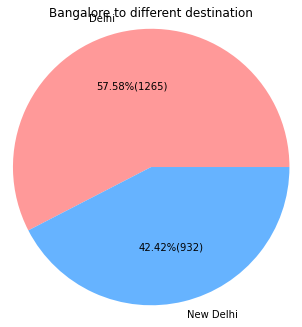

In [67]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Delhi','New Delhi']
value=[1265,932]
colors = ['#ff9999','#66b3ff']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Bangalore to different destination')
plt.show()

Observations:

1.48% of the flights from source bangalore is to Delhi

In [68]:
df1[(df1.Source==1)&(df1.Destination==0)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [69]:
df1[(df1.Source==1)&(df1.Destination==1)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [70]:
df1[(df1.Source==1)&(df1.Destination==2)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [71]:
df1[(df1.Source==1)&(df1.Destination==3)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [72]:
df1[(df1.Source==1)&(df1.Destination==4)].count()

Airline            381
Source             381
Destination        381
Route              381
Dep_Time           381
Arrival_Time       381
Duration           381
Total_Stops        381
Additional_Info    381
Price              381
year               381
Month              381
dtype: int64

In [73]:
df1[(df1.Source==1)&(df1.Destination==5)].count()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

Observations:

1.Chennai to New delhi there are 381 observations.

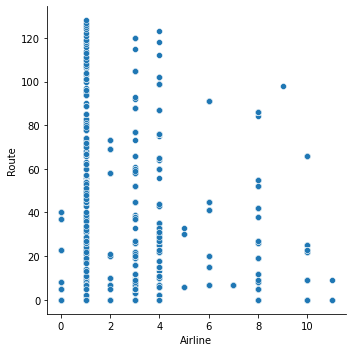

In [74]:
sns.relplot(y='Route',x='Airline',data=df1)

In [75]:
label_Airline[1]

1

Observations:

1.Air India takes almost all the different routes available to reach the destination.

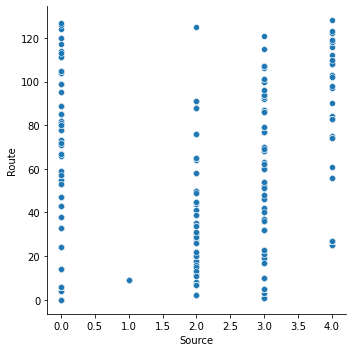

In [77]:
sns.relplot(y='Route',x='Source',data=df1)

Observations:

1.Chennai source takes very less routes.

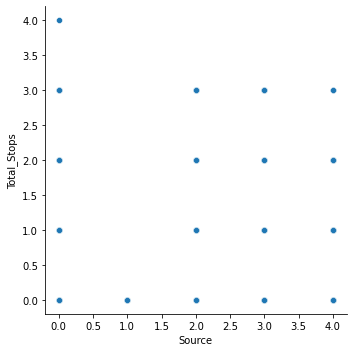

In [78]:
sns.relplot(y='Total_Stops',x='Source',data=df1)

Observations:

1.All flights from the chennai has 0 stops.

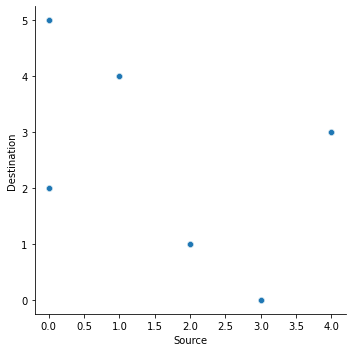

In [79]:
sns.relplot(y='Destination',x='Source',data=df1)

Observations:

1.From source Bangalore destination is held from Delhi and New Delhi.
2.From source chennai destination is held for only Kolkata.

Cleaning the data

In [80]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [81]:
df1['Total_Stops'].fillna(1,inplace=True)

In [82]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
year               0
Month              0
dtype: int64

In [83]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,Month
0,3,0,5,0,211,233,240,0.0,8,3897,0,1
1,1,3,0,1,31,906,336,2.0,8,7662,0,0
2,4,2,1,2,70,413,106,2.0,8,13882,0,5
3,3,3,0,3,164,1324,311,1.0,8,6218,0,6
4,3,0,5,4,149,1237,303,1.0,8,13302,0,0


Processing the test data

In [84]:
df_test=pd.read_excel('Test_set(fpp).xlsx',parse_dates=['Date_of_Journey'])

In [85]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [86]:
df_test['Route_new']=le.fit_transform(df_test['Route'])

In [87]:
df_test['year']=pd.DatetimeIndex(df_test['Date_of_Journey']).year

In [88]:
df_test['Month']=pd.DatetimeIndex(df_test['Date_of_Journey']).month

In [89]:
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [90]:
df_test.drop('Route',axis=1,inplace=True)

In [91]:
categorical=['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info','year',
       'Month']
for i in categorical:
    df_test[i]=le.fit_transform(df_test[i])

In [92]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Route_new,year,Month
0,4,2,1,138,150,10,0,5,76,0,4
1,3,3,0,31,353,248,0,5,65,0,6
2,4,2,1,156,566,148,0,3,76,0,3
3,6,2,1,48,633,36,0,5,76,0,3
4,0,0,2,198,135,216,4,5,16,0,4


In [93]:
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Route_new          0
year               0
Month              0
dtype: int64

In [94]:
df1.drop('Route',axis=1,inplace=True)

In [98]:
df1 = df

In [100]:
df_test.rename(columns = {'Route_new':'Route'}, inplace = True)

Removing the Outliers

In [101]:
from scipy.stats import zscore

zscore method

In [103]:
z=np.abs(zscore(df1))
threshold=3
df2=df1[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df1.shape[0]-df2.shape[0])/df1.shape[0])

percentage of loss of data by zscore is : 1.0


Observations:

1.No need to remove the outliers.

Splitting the target variables

In [104]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [105]:
x.shape

(10683, 10)

In [106]:
y.shape

(10683,)

Removal of Skewness

In [107]:
x.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.317049
Additional_Info   -1.779838
year               0.000000
Month             -0.137820
dtype: float64

Observations:

1.No need to remove the skewness for categorical column.

Building the Models

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [109]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.44043863850331466 on random state 64


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=192)

In [111]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (7478, 10)
x test shape (3205, 10)


y train shape: (7478,)
y test shape (3205,)


In [112]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.43
RMSE: 3310.641
mean absolute error: 2509.027


In [113]:
#lasso model
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.43
RMSE: 3310.641
mean absolute error: 2509.027


In [114]:
#Ridge model
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.43
RMSE: 3310.641
mean absolute error: 2509.027


In [115]:
#ElasticNet model
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.43
RMSE: 3310.632
mean absolute error: 2509.014


In [116]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.266
RMSE: 3757.46
mean absolute error: 2723.022


In [117]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.835
RMSE: 1782.334
mean absolute error: 993.972


Cross Validation Scores

In [118]:
models=[ln,ls,rd,enr,ran,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.392


Lasso(alpha=0.001) score is:
0.392


Ridge(alpha=0.001) score is:
0.392


ElasticNet(alpha=0.0001) score is:
0.392


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.272


RandomForestRegressor() score is:
0.814




Observations:

The difference between r2 score and cross val value of models are as below:
1.LinearRegression:0.045
2.Lasso           :0.045
3.Ridge           :0.045
4.ElasticNet      :0.045
5.RANSACRegressor :0.045
6.RF              :0.021

    So the best model is Random Forest Regressor.

Hyper Parameter Tuning

In [125]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    
    'max_depth':[10,20,30,40,50],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_split':[2,5,10,15,20],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

KeyboardInterrupt: 

Observations:

1.The resulted values been inputed, since I refreshed it its still running.

In [120]:
rf1=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2,bootstrap=True)

In [121]:
rf1.fit(x_train, y_train)
predrf1=rf1.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf1)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf1)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf1)),3))

r2 score is : 0.81
RMSE: 1913.489
mean absolute error: 1219.613
